<a href="https://colab.research.google.com/github/shankarchalla987/PClub-Tasks/blob/main/CNN_TASK_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
train,test = tfds.load('cats_vs_dogs', split=['train[:80%]','train[80%:100%]'], shuffle_files=True, as_supervised=True)





Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete9IYS0E/cats_vs_dogs-train.tfrecord


Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


Saving images of cats and dogs in their respective **lists**


> Resizing of images is also done here



In [ ]:

x_train=[]
y_train=[]
y_test=[]
x_test=[]
categories=['cats','dogs']
for i in train:
  k=i[0]
  x_train.append(cv2.resize(np.asarray(k),(100,100)))
  y_train.append(int(i[1]))
for i in test:
  k=i[0]
  x_test.append(cv2.resize(np.asarray(k),(100,100)))
  y_test.append(int(i[1]))

  
    


In [ ]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

**Function to plot images**







In [ ]:
def plot_sample(X, index):
    plt.figure(figsize = (20,3))
    
    plt.imshow(X[index])
    
    
    

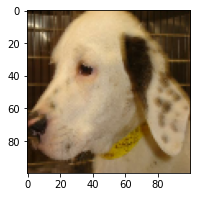

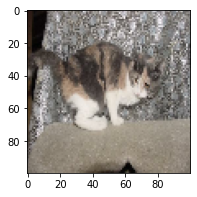

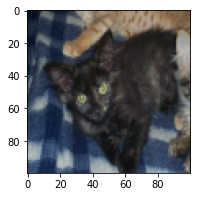

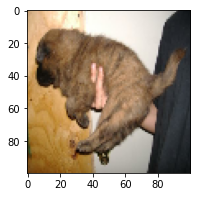

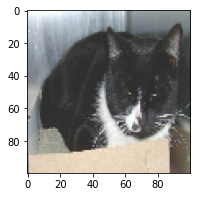

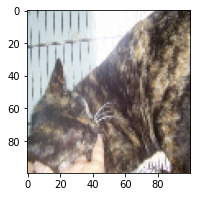

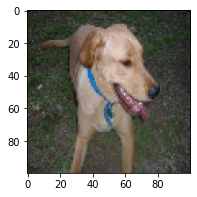

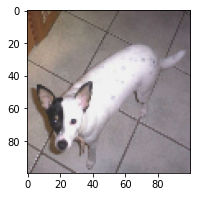

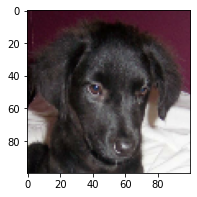

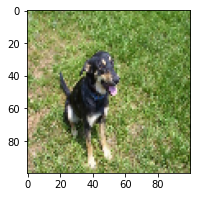

In [ ]:
import random
random_list=[]
for i in range(10):
  u=random.randint(0,18000)
  random_list.append(u)
  plot_sample(x_train,u)

In [ ]:
d_a=tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1),
  
])


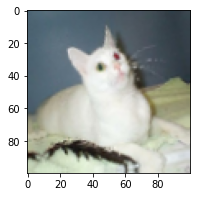

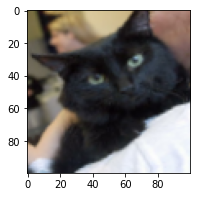

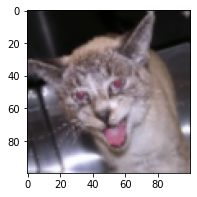

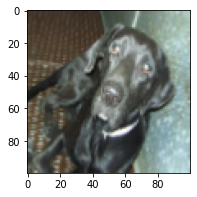

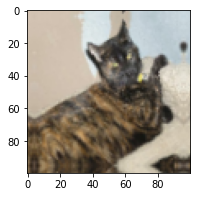

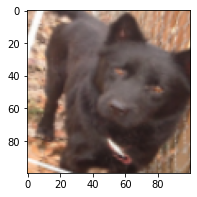

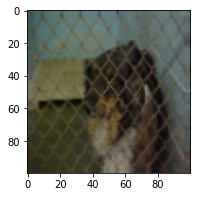

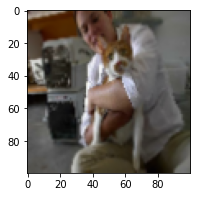

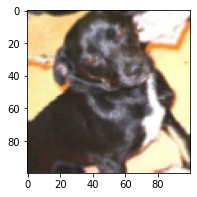

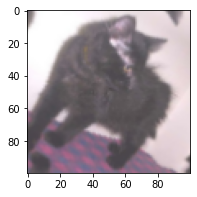

In [ ]:
for i in random_list:
  plot_sample(d_a(x_train),i)

In [ ]:
x_test=x_test/255.0
x_train=x_train/255.0

In [ ]:

import keras
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(100, 100, 3), padding='same'))
model.add(keras.layers.MaxPooling2D((3,3)))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(keras.layers.BatchNormalization())


model.add(keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(64,activation='relu'))

inputs = keras.Input(shape=(100, 100, 3))
x = d_a(inputs)

x = model(x, training=True)

x = keras.layers.Dropout(0.1)(x) 

outputs = keras.layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)

model.summary()




Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 100, 100, 3)       0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 64)                1380576   
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 1,380,641
Trainable params: 1,380,257
Non-trainable params: 384
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train,validation_split=0.1, epochs=30)

Epoch 1/30
524/524 [==============================] - 9s 15ms/step - loss: 0.2842 - accuracy: 0.8853 - val_loss: 0.2519 - val_accuracy: 0.8904
Epoch 2/30
524/524 [==============================] - 7s 14ms/step - loss: 0.2879 - accuracy: 0.8783 - val_loss: 0.2485 - val_accuracy: 0.9049
Epoch 3/30
524/524 [==============================] - 7s 14ms/step - loss: 0.2779 - accuracy: 0.8825 - val_loss: 0.2256 - val_accuracy: 0.9070
Epoch 4/30
524/524 [==============================] - 7s 14ms/step - loss: 0.2585 - accuracy: 0.8874 - val_loss: 0.2444 - val_accuracy: 0.8952
Epoch 5/30
524/524 [==============================] - 7s 14ms/step - loss: 0.2642 - accuracy: 0.8895 - val_loss: 0.2321 - val_accuracy: 0.9097
Epoch 6/30
524/524 [==============================] - 8s 14ms/step - loss: 0.2533 - accuracy: 0.8933 - val_loss: 0.2469 - val_accuracy: 0.8909
Epoch 7/30
524/524 [==============================] - 7s 14ms/step - loss: 0.2524 - accuracy: 0.8933 - val_loss: 0.2470 - val_accuracy: 0.8990

In [ ]:
model.evaluate(x_test,y_test)

146/146 [==============================] - 1s 5ms/step - loss: 0.1776 - accuracy: 0.9273


[0.17758506536483765, 0.9273430705070496]

In [ ]:
predictions=model.predict(x_test)